In [1]:

pip install librosa hmmlearn

   ---------------------------------------- 124.5/124.5 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [11]:
pip install numpy==1.21


   ---------------------------------------- 14.0/14.0 MB 1.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow-intel 2.14.0 requires numpy>=1.23.5, but you have numpy 1.21.0 which is incompatible.


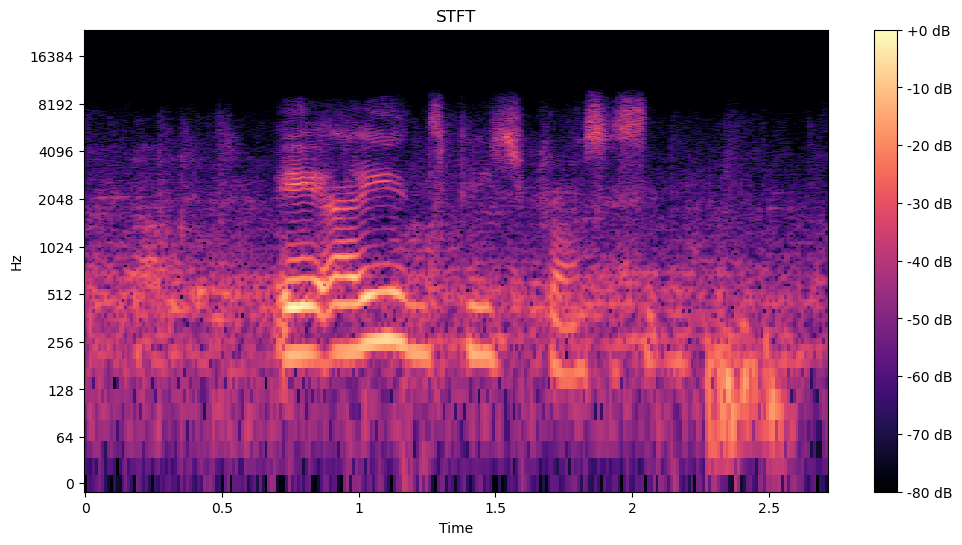

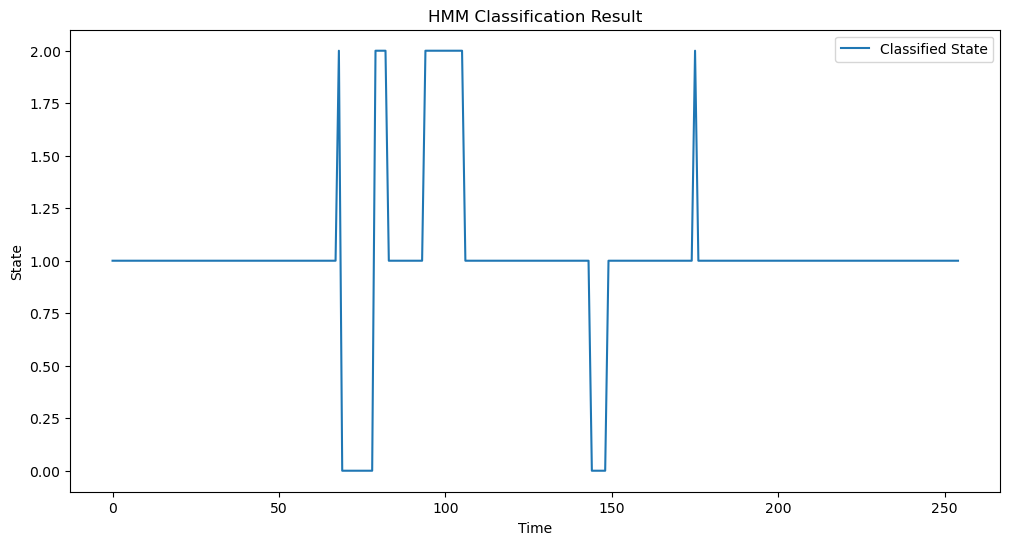

HMM Model Parameters:
Transition Matrix:
[[0.86666667 0.06666667 0.06666667]
 [0.00452489 0.98190045 0.01357466]
 [0.05555556 0.16666667 0.77777778]]
Means:
[[4.26753075e-01 6.88092525e-01 1.06962000e+00 ... 2.08903058e-04
  2.82542248e-04 3.03754360e-04]
 [6.82682976e-01 1.10095961e+00 2.27567866e+00 ... 2.59372637e-04
  2.62565140e-04 2.44161409e-04]
 [5.58493529e-01 5.54029913e-01 1.08472862e+00 ... 2.36506532e-04
  3.11762849e-04 2.66473435e-04]]
Covariances:
[[[1.07781988e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 2.85402952e-01 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 2.10367596e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.66684989e-04
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   6.66683439e-04 0.00000000e+00]
  [0.00000000e+00 0.0

In [13]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

def load_audio(file_path):
    ydata, sr = librosa.load(file_path, sr=None)
    return ydata, sr

def stft_features(ydata, sr):
    stft = np.abs(librosa.stft(ydata))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_path ="AI_IN_SP_AUDIO_RECORDING.wav"
    
    # Load audio
    y, sr = load_audio(audio_file_path)
    
    # Extract STFT features
    stft = stft_features(y, sr)
    
    # Plot STFT
    plot_stft(stft, sr)
    
    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
if __name__ == "__main__":
    main()


In [9]:
import numpy as np
import librosa
from hmmlearn import hmm
 
# Load the audio file
file_path = "AISP_VOICE_21007.wav"  # Assuming the file is in the same directory as your notebook
signal, sr = librosa.load(file_path, sr=None)
 
# Extract STFT features
stft = np.abs(librosa.stft(signal))
 
# Convert STFT features to observation sequence
obs_seq = np.transpose(stft)
 
# Train an HMM model
num_states = 3  # Number of states in the HMM
num_mix = 1     # Number of mixtures in each state
model = hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=1000)
model.fit(obs_seq)
 
# Classify using trained HMM model
predicted_labels = model.predict(obs_seq)
 
# Output the predicted labels
print("Predicted labels:", predicted_labels)


Fitting a model with 1580558 free scalar parameters with only 203975 data points will result in a degenerate solution.


Predicted labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0
 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
